# Extracción de Caracteristicas: SIFT

En este Notebook, hemos realizado la prueba de extrer las caracteristicas de los pares de huellas usando el detector de caracteristicas SIFT, para ello hemos usado el codigo de ejemplo para cargar los las imagenes. Hemos usado el detector de Caracteristicas SIFT (sin modificar los parametros predeterminados) que hemos visto en las clases prácticas con Jose Carlos, y finalmente observamos las imagenes originales (tanto la version s, como la version f) y sus caracteristicas pintadas. En las imagenes no se observan muy bien porque se ven pequeñas, pero si se ven en su tamaño original, se observaran circulos de diferentes colores resaltando las caracteristicas. Ademas, estas pruebas se han realizado con las imagenes originales (sin preprocesamientos).

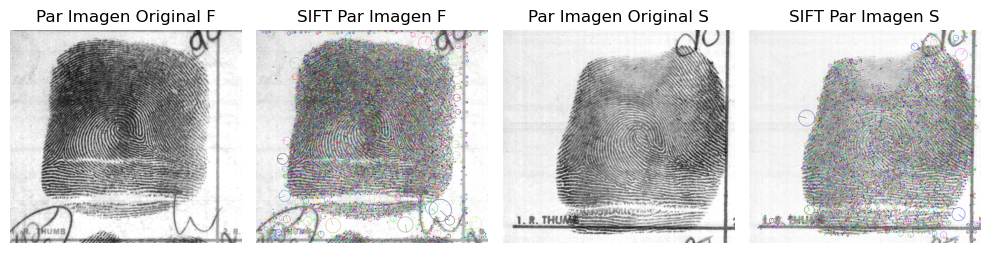

11289 11289


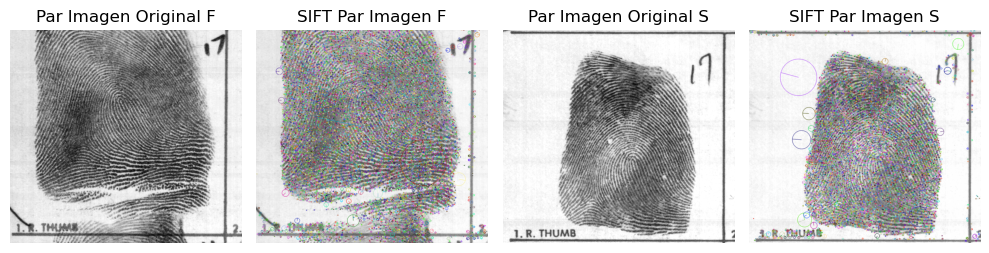

12223 12223


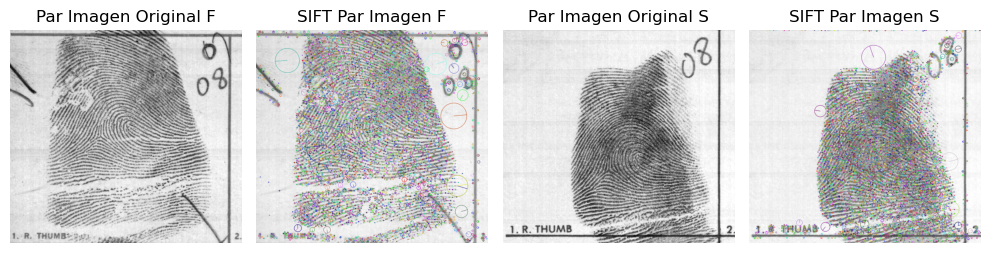

9020 9020


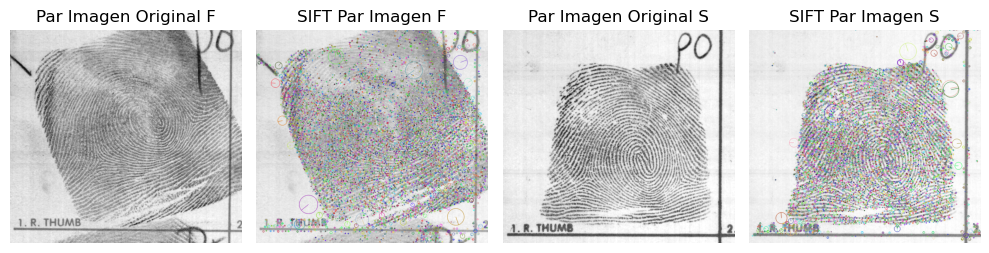

8829 8829


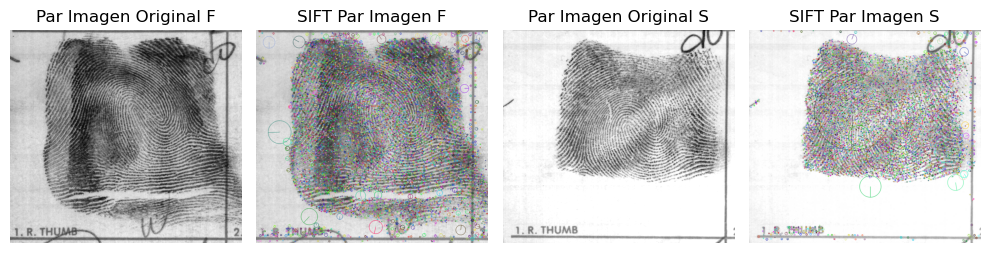

10718 10718


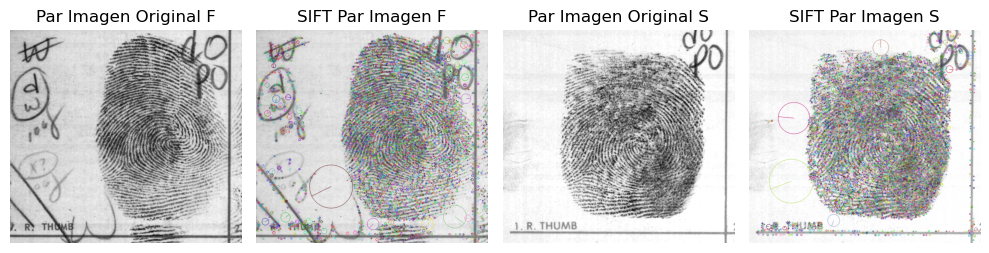

7131 7131


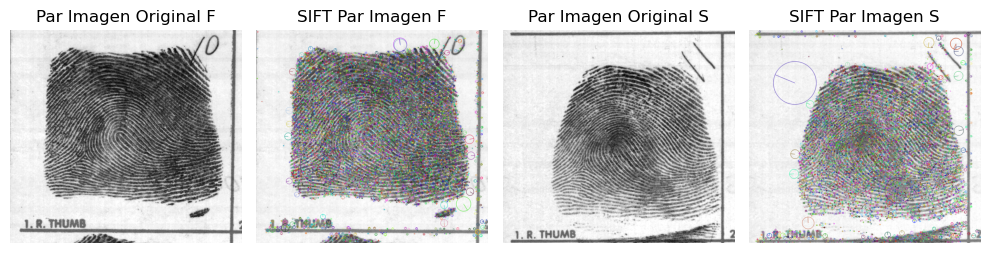

9148 9148


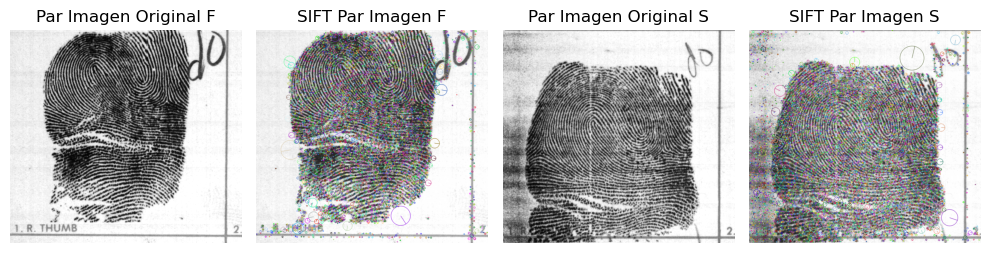

8032 8032


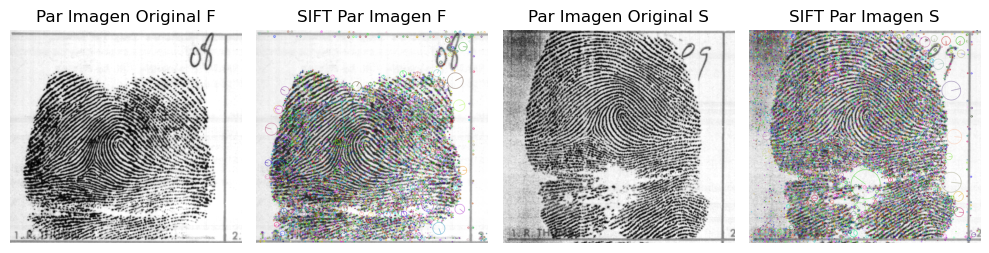

7119 7119


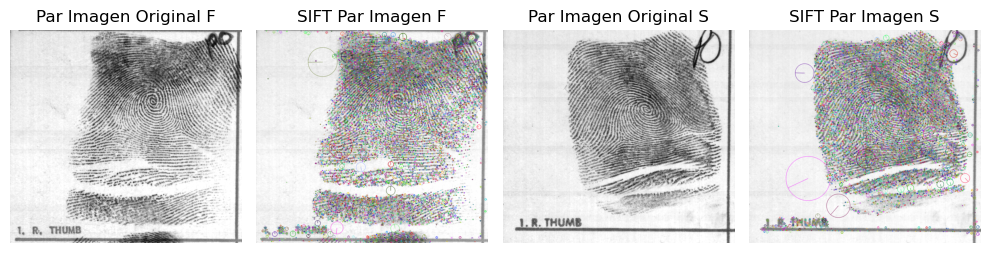

10092 10092


In [ ]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

sample_path = "../BaseDatosNISTsd09_pr"
folders = sorted(os.listdir(sample_path))

for folder in folders:
    dir_path = os.path.join(sample_path, folder)
    files = sorted(os.listdir(dir_path))

    if len(files) == 0:
        continue
    #Cargamos la ruta de la imagen
    ruta_f = os.path.join(dir_path, files[0])
    ruta_s = os.path.join(dir_path, files[1])
    img_s = cv.imread(ruta_s, cv.IMREAD_GRAYSCALE) #Escala Gris
    if img_s is None:
        continue
    
    img_f = cv.imread(ruta_f, cv.IMREAD_GRAYSCALE) #Escala Gris
    if img_f is None:
        continue
    
    sift = cv.SIFT_create()
    keypoints_s, descriptors_s = sift.detectAndCompute(img_s, None)
    keypoints_f, descriptors_f = sift.detectAndCompute(img_f, None)
    img_s_with_keypoints = cv.drawKeypoints(img_s, keypoints_s, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_f_with_keypoints = cv.drawKeypoints(img_f, keypoints_f, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 4, 1)
    plt.imshow(img_f, cmap='gray')
    plt.title("Par Imagen Original F")
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.imshow(img_f_with_keypoints, cmap='gray')
    plt.title("SIFT Par Imagen F")
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.imshow(img_s, cmap='gray')
    plt.title("Par Imagen Original S")
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.imshow(img_s_with_keypoints, cmap='gray')
    plt.title("SIFT Par Imagen S")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
